### Skript to Visualize 
package mathplotlip 

In [ ]:
import matplotlib.pyplot as plt
import common_paths
import pandas as pd
import numpy as np

In [44]:
#area.to_csv(common_paths.DATA.joinpath("dwd/area_Brandenburg.csv"))
df_number = pd.read_csv(common_paths.DATA.joinpath("dwd/nr_Brandenburg.csv"))
df_area   = pd.read_csv(common_paths.DATA.joinpath("dwd/area_Brandenburg.csv"))
df_predict_numbers = pd.read_csv(common_paths.DATA.joinpath("dwd/final_predictions.csv"))
df_predict_numbers['time_in_months'] = df_predict_numbers['Year'] + (df_predict_numbers['Month'] - 1) / 12
df_number['time_in_months'] = df_number['Year'] + (df_number['Month'] - 1) / 12
df_number = df_number.merge(df_area[['Year', 'Month', 'area']], on=['Year', 'Month'], how='left')

In [47]:
#df_predict_numbers
df_number
#df_area
#gorupby('Year','Month)

# Was braucht Monat Jahr Bundesland Prediction Value 

,Unnamed: 0,Year,Month,pr,sfcWind,tasmax,nFires,time_in_months,area
0,0,1995,1,54.510526,4.248165,285.460526,0.0,1995.000000,NaN
1,1,1995,2,58.410526,4.695987,288.128947,2.0,1995.083333,NaN
2,2,1995,3,45.657895,4.524660,288.934211,14.0,1995.166667,NaN
3,3,1995,4,38.452632,3.856740,300.413158,30.0,1995.250000,NaN
4,4,1995,5,57.610526,2.618022,301.792105,78.0,1995.333333,NaN
...,...,...,...,...,...,...,...,...,...
331,331,2022,8,54.592857,2.305166,310.064286,81.0,2022.583333,20.00
332,332,2022,9,55.361538,2.716161,299.419231,10.0,2022.666667,1.95
333,333,2022,10,25.992857,2.876683,297.521429,2.0,2022.750000,0.00
334,334,2022,11,19.025000,3.127164,290.412500,1.0,2022.833333,0.00


In [ ]:

#uniqu = np.unique(df_number['nFires'].values)
df_number.info()
df_area.info()
#drop 
# TODO Dataset bearbeiten nur noch wenn ich auf die features hinauswill 

In [ ]:
#Ideen Viz für predictions 
# Eine Map für ein Monat 
#Plot und Scatter unterschiede 

In [ ]:
fig, ax = plt.subplots()             # Create a figure containing a single Axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Plot some data on the Axes.
plt.show()                           # Show the figure.

In [ ]:
fig = plt.figure()             # an empty figure with no Axes
fig, ax = plt.subplots()       # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes
# a figure with one Axes on the left, and two on the right:
fig, axs = plt.subplot_mosaic([['left', 'right_top'],
                               ['left', 'right_bottom']])

Text(0, 0.5, 'number of fires')

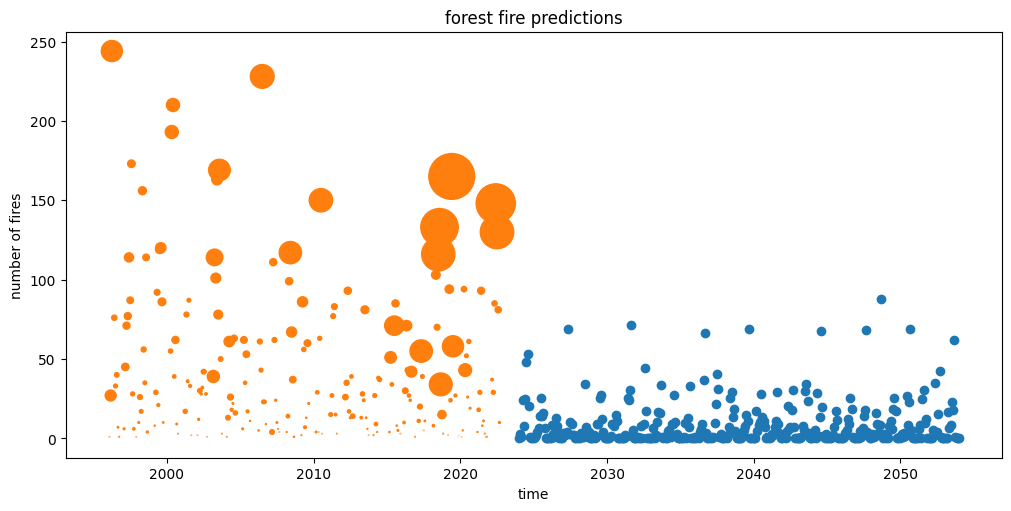

In [49]:
# Scatter Plot of fires 


fig, ax = plt.subplots(figsize=(10, 5), layout='constrained')
ax.scatter('time_in_months', 'nr_predictions', data = df_predict_numbers)
ax.scatter('time_in_months', 'nFires', s='area', data=df_number)
#x.scatter(data=)
ax.set_title('forest fire predictions')
ax.set_xlabel('time')
ax.set_ylabel('number of fires')